# Exploratory Data Analysis (EDA)

**Goals:**
* Understand data distributions
* Identify missing values or outliers
* Explore relationships between features and churn
* Start hypothesizing which features might be predictive

In [51]:
import kagglehub
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download latest version
path = kagglehub.dataset_download("ankitverma2010/ecommerce-customer-churn-analysis-and-prediction")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\TLG User\.cache\kagglehub\datasets\ankitverma2010\ecommerce-customer-churn-analysis-and-prediction\versions\1


In [32]:
info_df = pd.read_excel(path + '\\E Commerce Dataset.xlsx', sheet_name='Data Dict', skiprows=1)[['Data','Variable','Discerption']].rename(columns={'Discerption':'Description'})
df = pd.read_excel(path + '\\E Commerce Dataset.xlsx', sheet_name='E Comm', index_col='CustomerID')

df.to_csv(str(pathlib.Path.cwd().parents[0]) + '\\data\\ecommerce_churn_data.csv')

In [9]:
info_df

,Data,Variable,Description
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [8]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42


In [36]:
plt.style.use('ggplot')

In [85]:
df['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain     

<Axes: >

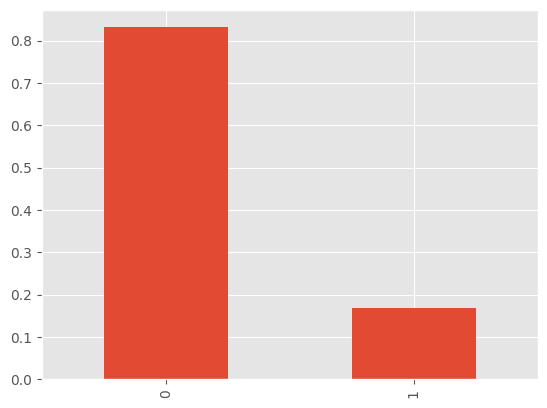

In [45]:
df.info()
df['Churn'].value_counts(normalize=True).plot(kind='bar')

In [46]:
missing = df.isnull().sum()
missing[missing > 0]

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [49]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(include=np.number).columns

print("Categorical:", categorical)
print("Numerical:", numerical)

Categorical: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
Numerical: Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


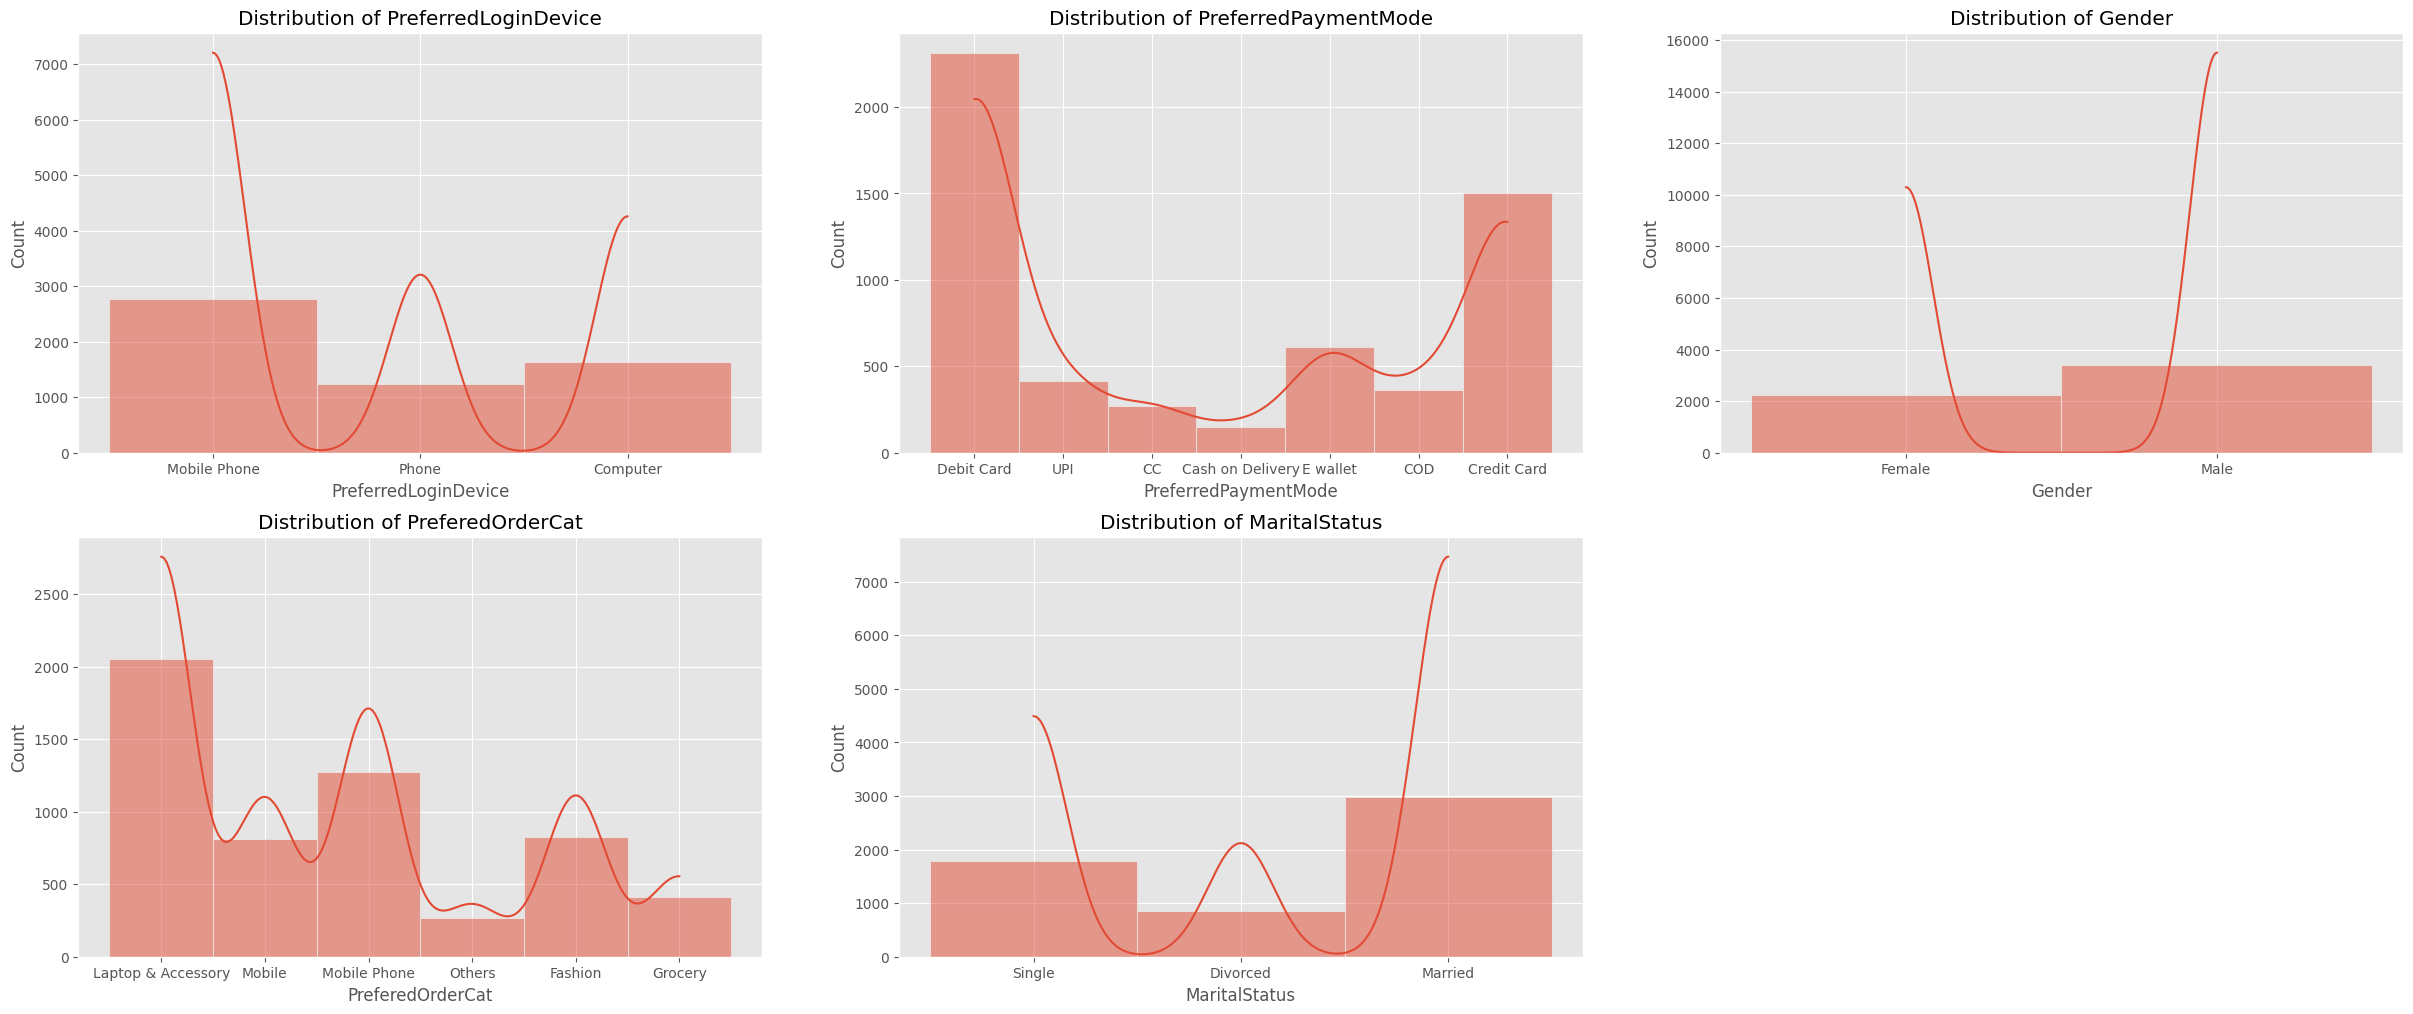

In [83]:
# Univariate Analysis
i = 1
plt.figure(figsize=(30,12))
for col in categorical:
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    i += 1
plt.show()

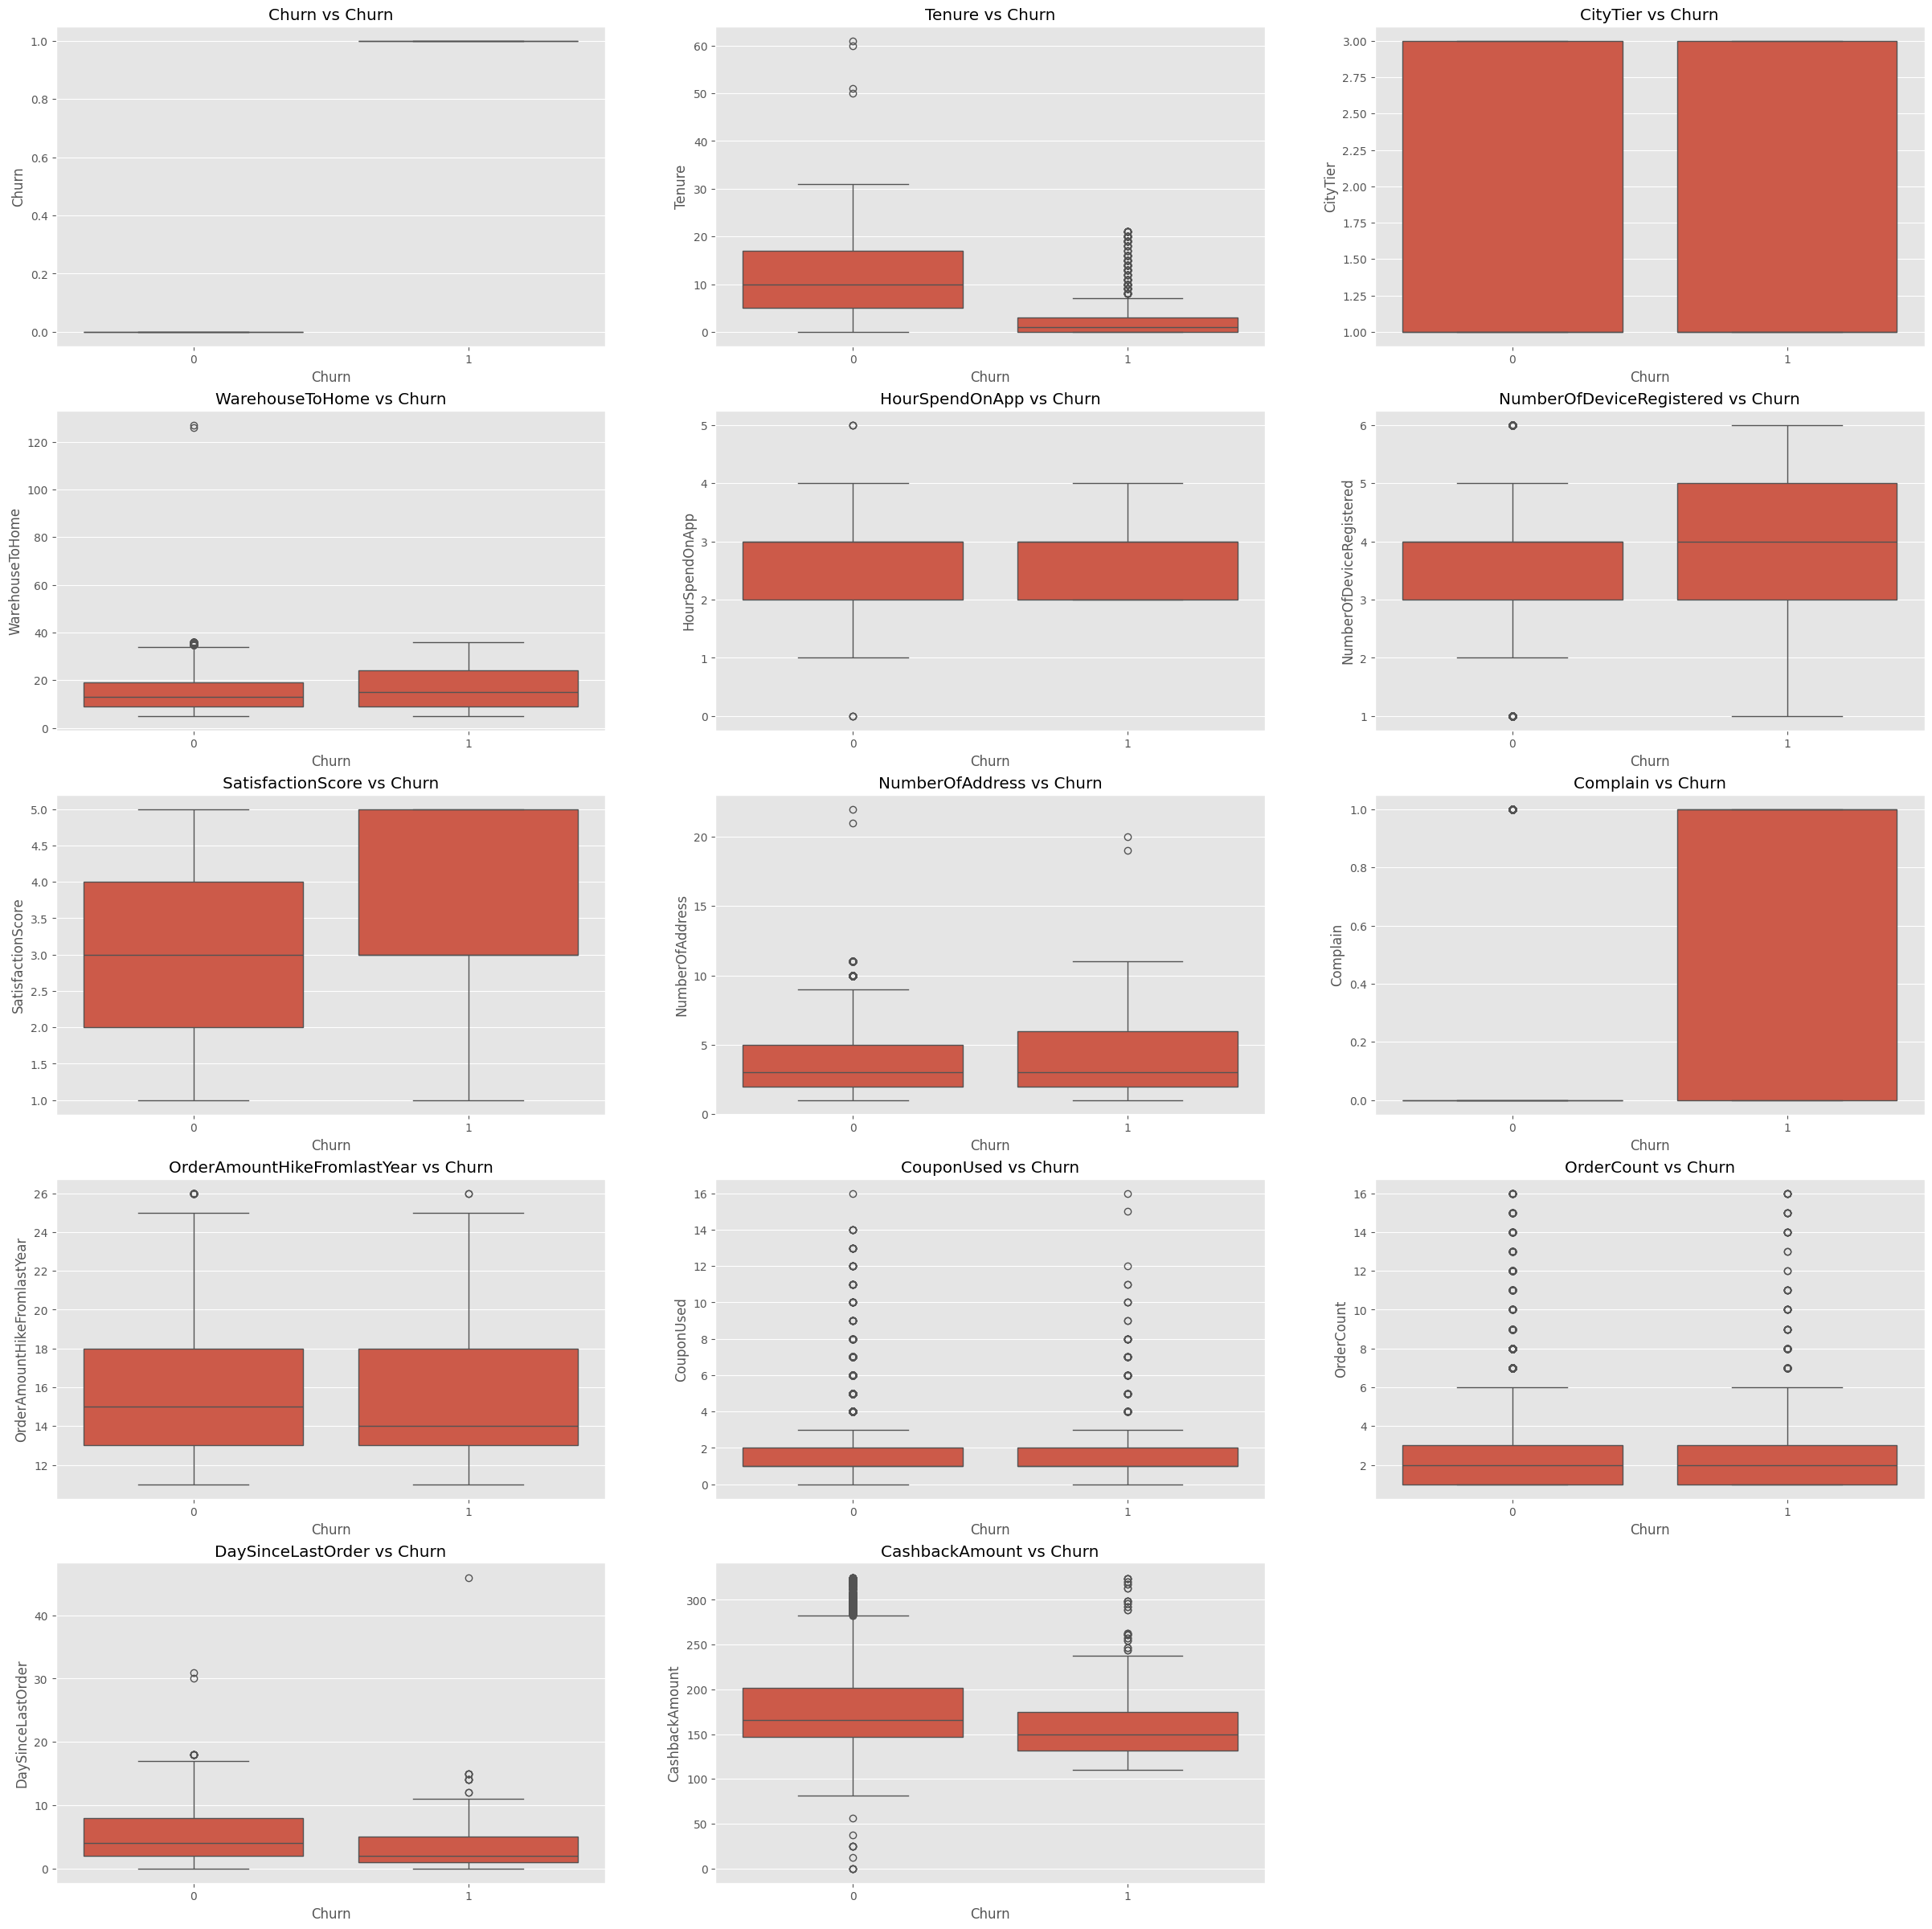

In [78]:
# Bivariate Analysis
plt.figure(figsize=(30,30))
i = 1
for col in numerical:
    plt.subplot(5, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    i += 1
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

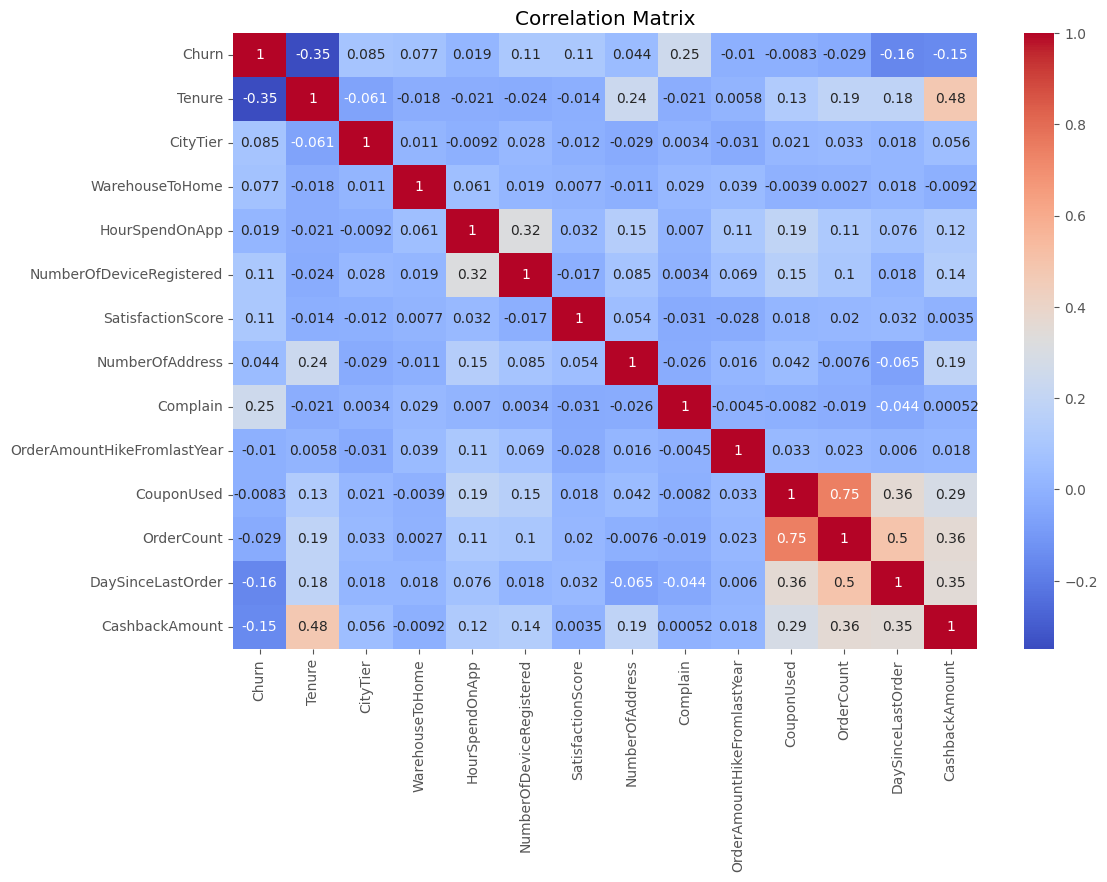

In [81]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

## Notes
### 🔍 Key Observations

#### Strong Predictors of Churn:
- **SatisfactionScore**: Clear separation between churned and retained users; lower satisfaction strongly associated with churn.
- **Complain**: Customers who submitted a complaint show a high correlation with churn.
- **Tenure**: Short-tenure users are more likely to churn.
- **CashbackAmount**: Customers receiving lower cashback are more churn-prone.

#### Additional Considerations:
- **DaySinceLastOrder** is relevant, but correlated with **CashbackAmount**; consider potential redundancy.

#### Categorical Variables for Modeling:
- **PreferredLoginDevice**
- **PreferredPaymentMode**
- **PreferredOrderCat**

### Cautions & Enhancements

#### Multicollinearity:
- Potential collinearity between `CashbackAmount` and `DaySinceLastOrder`.
- Consider VIF (Variance Inflation Factor) analysis to detect multicollinearity before modeling.

#### Imbalanced Target:
- Class distribution is skewed toward non-churned users - 83% non-churned
- Consider:
  - Class weight adjustments
  - SMOTE (Synthetic Minority Oversampling Technique) or undersampling
  - F1-score, ROC-AUC (Receiver Operating Characteristic – Area Under Curve) as primary metrics

#### Feature Interactions to Explore:
- Combined effect of device usage and satisfaction
- Payment mode impact by gender
- Cashback effect by preferred order category

#### Encoding Strategy:
- Label encode ordinal features 
- One-hot encode nominal categories
- Consider target encoding for high-cardinality features

- Consider encoding Tenure to create customer groups
    -  “new”, “established”, “veteran”